# Note :    Riêng **Colab** phải **Ctrl+S** hoặc **Save** thì mới update được nha mọi người.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from sklearn.model_selection import train_test_split


# 1.Data Preparation

## 1.1. Data Shuffling

### 1.1.1 Daily Activity


In [2]:
# Correct URL to the raw CSV file on GitHub
dailyActivity = pd.read_csv('../data/dailyActivity_merged.csv')
dailyActivity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [3]:
dailyActivity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        457 non-null    int64  
 1   ActivityDate              457 non-null    object 
 2   TotalSteps                457 non-null    int64  
 3   TotalDistance             457 non-null    float64
 4   TrackerDistance           457 non-null    float64
 5   LoggedActivitiesDistance  457 non-null    float64
 6   VeryActiveDistance        457 non-null    float64
 7   ModeratelyActiveDistance  457 non-null    float64
 8   LightActiveDistance       457 non-null    float64
 9   SedentaryActiveDistance   457 non-null    float64
 10  VeryActiveMinutes         457 non-null    int64  
 11  FairlyActiveMinutes       457 non-null    int64  
 12  LightlyActiveMinutes      457 non-null    int64  
 13  SedentaryMinutes          457 non-null    int64  
 14  Calories  

In [4]:
from sklearn.utils import shuffle

dailyActivity = shuffle(dailyActivity)
dailyActivity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
430,8583815059,4/6/2016,2098,1.64,1.64,0.0,0.00,0.00,1.63,0.00,0,0,112,1328,2354
328,6290855005,4/5/2016,0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0,0,0,1440,2060
180,4020332650,3/27/2016,7144,5.12,5.12,0.0,0.00,0.00,0.00,0.00,0,0,0,1440,3510
39,1644430081,4/2/2016,20237,14.71,14.71,0.0,2.57,6.40,5.73,0.01,34,141,347,918,4029
453,8877689391,4/9/2016,16470,8.07,8.07,0.0,0.00,0.02,8.02,0.00,90,9,289,1052,3841


### 1.1.2. Heart Rate Second

In [5]:
# Correct URL to the raw CSV file on GitHub
heartRate = pd.read_csv('../data/heartrate_seconds_merged.csv')
heartRate.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


In [6]:
heartRate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483658 entries, 0 to 2483657
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Time    object
 2   Value   int64 
dtypes: int64(2), object(1)
memory usage: 56.8+ MB


In [7]:
from sklearn.utils import shuffle

heartRate = shuffle(heartRate)
heartRate.head()

,Id,Time,Value
1122731,5553957443,4/22/2016 3:53:38 PM,114
1925560,6962181067,5/3/2016 11:19:30 PM,70
1291073,5553957443,5/12/2016 5:31:35 AM,69
1677183,6117666160,5/7/2016 2:50:10 AM,74
650032,4388161847,4/19/2016 12:44:35 PM,60


### 1.1.3. Hourly Calories

In [8]:
# Correct URL to the raw CSV file on GitHub
hourlyCalories = pd.read_csv('../data/hourlyCalories_merged.csv')
hourlyCalories.head()

,Id,ActivityHour,Calories
0,1503960366,3/12/2016 12:00:00 AM,48
1,1503960366,3/12/2016 1:00:00 AM,48
2,1503960366,3/12/2016 2:00:00 AM,48
3,1503960366,3/12/2016 3:00:00 AM,48
4,1503960366,3/12/2016 4:00:00 AM,48


In [9]:
hourlyCalories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24084 entries, 0 to 24083
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            24084 non-null  int64 
 1   ActivityHour  24084 non-null  object
 2   Calories      24084 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 564.6+ KB


In [10]:
from sklearn.utils import shuffle

hourlyCalories = shuffle(hourlyCalories)
hourlyCalories.head()

,Id,ActivityHour,Calories
17875,6962181067,3/31/2016 2:00:00 PM,71
17627,6962181067,3/21/2016 6:00:00 AM,54
9488,4020332650,4/4/2016 6:00:00 AM,85
15843,6290855005,3/25/2016 4:00:00 AM,86
24071,8877689391,4/11/2016 8:00:00 PM,122


### 1.1.4. Hourly Intensities

In [11]:
# Correct URL to the raw CSV file on GitHub
hourlyIntensities = pd.read_csv('../data/hourlyCalories_merged.csv')
hourlyIntensities.head()

,Id,ActivityHour,Calories
0,1503960366,3/12/2016 12:00:00 AM,48
1,1503960366,3/12/2016 1:00:00 AM,48
2,1503960366,3/12/2016 2:00:00 AM,48
3,1503960366,3/12/2016 3:00:00 AM,48
4,1503960366,3/12/2016 4:00:00 AM,48


In [12]:
hourlyIntensities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24084 entries, 0 to 24083
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            24084 non-null  int64 
 1   ActivityHour  24084 non-null  object
 2   Calories      24084 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 564.6+ KB


In [13]:
from sklearn.utils import shuffle

hourlyIntensities = shuffle(hourlyIntensities)
hourlyIntensities.head()

,Id,ActivityHour,Calories
10584,4319703577,3/18/2016 11:00:00 AM,113
23496,8877689391,3/18/2016 9:00:00 PM,110
7425,2873212765,4/10/2016 9:00:00 AM,70
11547,4445114986,3/30/2016 3:00:00 PM,123
10706,4319703577,3/23/2016 1:00:00 PM,91


### 1.1.5. Sleep Day

In [14]:
# Correct URL to the raw CSV file on GitHub
sleepDay = pd.read_csv('../data/sleepDay_merged.csv')
sleepDay.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [15]:
sleepDay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [16]:
from sklearn.utils import shuffle

sleepDay = shuffle(sleepDay)
sleepDay.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
377,8378563200,4/23/2016 12:00:00 AM,1,565,591
349,7086361926,4/26/2016 12:00:00 AM,1,485,500
183,4445114986,5/1/2016 12:00:00 AM,2,439,459
295,6117666160,4/28/2016 12:00:00 AM,1,393,416
192,4445114986,5/10/2016 12:00:00 AM,1,405,426


### 1.1.6. Weight Info

In [17]:
# Correct URL to the raw CSV file on GitHub
weightLogInfo = pd.read_csv('../data/weightLogInfo_merged.csv')
weightLogInfo.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [18]:
weightLogInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


In [19]:
from sklearn.utils import shuffle

weightLogInfo = shuffle(weightLogInfo)
weightLogInfo.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
65,8877689391,5/11/2016 6:51:47 AM,85.400002,188.274775,NaN,25.559999,False,1462949507000
48,8877689391,4/19/2016 6:39:31 AM,85.300003,188.054316,NaN,25.530001,False,1461047971000
38,6962181067,5/8/2016 11:59:59 PM,61.200001,134.922906,NaN,23.889999,True,1462751999000
12,5577150313,4/17/2016 9:17:55 AM,90.699997,199.959265,NaN,28.000000,False,1460884675000
23,6962181067,4/22/2016 11:59:59 PM,61.400002,135.363832,NaN,23.959999,True,1461369599000


## 1.2. Data Preprocessing

### 1.2.1. Cleaning the datasets

#### 1.2.1.a. Convert all the date columns into datetime object and rename it as ActivityDate

In [20]:
dailyActivity['ActivityDate'] = pd.to_datetime(dailyActivity['ActivityDate'])

In [21]:
def process_dataframe(df):
    # converting date column to datetime
    date_col = df.columns[1]
    df[date_col] = pd.to_datetime(df[date_col])

    # Creating separate 'date' and 'time' columns
    df['ActivityDate'] = df[date_col].dt.date
    df['ActivityTime'] = df[date_col].dt.strftime('%I:%M:%S %p')
    df['ActivityDate'] = pd.to_datetime(df['ActivityDate'])
    df.drop(columns=[date_col],inplace=True)

    return df

dataframes = [sleepDay, hourlyCalories, hourlyIntensities, heartRate, weightLogInfo]

for i, df in enumerate(dataframes):
    dataframes[i] = process_dataframe(df)

for i, df in enumerate(dataframes, 1):
    print(f"DataFrame {i}:\n", df.head())
    print(df['ActivityDate'].dtypes)

C:\Users\Admin\AppData\Local\Temp\ipykernel_21256\416243218.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_col] = pd.to_datetime(df[date_col])
C:\Users\Admin\AppData\Local\Temp\ipykernel_21256\416243218.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_col] = pd.to_datetime(df[date_col])
C:\Users\Admin\AppData\Local\Temp\ipykernel_21256\416243218.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_col] = pd.to_datetime(df[date_col])


DataFrame 1:
              Id  TotalSleepRecords  TotalMinutesAsleep  TotalTimeInBed  \
377  8378563200                  1                 565             591   
349  7086361926                  1                 485             500   
183  4445114986                  2                 439             459   
295  6117666160                  1                 393             416   
192  4445114986                  1                 405             426   

    ActivityDate ActivityTime  
377   2016-04-23  12:00:00 AM  
349   2016-04-26  12:00:00 AM  
183   2016-05-01  12:00:00 AM  
295   2016-04-28  12:00:00 AM  
192   2016-05-10  12:00:00 AM  
datetime64[ns]
DataFrame 2:
                Id  Calories ActivityDate ActivityTime
17875  6962181067        71   2016-03-31  02:00:00 PM
17627  6962181067        54   2016-03-21  06:00:00 AM
9488   4020332650        85   2016-04-04  06:00:00 AM
15843  6290855005        86   2016-03-25  04:00:00 AM
24071  8877689391       122   2016-04-11  08:00:00

#### 1.2.1.b.  Check if there are any duplicate records

In [22]:
grouped = dailyActivity.groupby(['Id', 'ActivityDate']).size().reset_index(name='Count')
duplicates = grouped[grouped['Count'] > 1]
print("\n Duplicates in activity record:")
print(duplicates)

grouped1 = sleepDay.groupby(['Id', 'ActivityDate','ActivityTime','TotalSleepRecords']).size().reset_index(name='Count')
duplicates1 = grouped1[grouped1['Count'] > 1]
print("\nDuplicates in sleep record:")
print(duplicates1)

grouped2 = hourlyCalories.groupby(['Id', 'ActivityDate','ActivityTime']).size().reset_index(name='Count')
duplicates2 = grouped2[grouped2['Count'] > 1]
print("\nDuplicates in hourly calories record:")
print(duplicates2)


grouped3 = hourlyIntensities.groupby(['Id', 'ActivityDate','ActivityTime']).size().reset_index(name='Count')
duplicates3 = grouped3[grouped3['Count'] > 1]
print("\nDuplicates in hourly intensities record:")
print(duplicates3)

grouped4 = heartRate.groupby(['Id', 'ActivityDate','ActivityTime']).size().reset_index(name='Count')
duplicates4 = grouped4[grouped4['Count'] > 1]
print("\nDuplicates in heartrate seconds record:")
print(duplicates4)


 Duplicates in activity record:
Empty DataFrame
Columns: [Id, ActivityDate, Count]
Index: []

Duplicates in sleep record:
             Id ActivityDate ActivityTime  TotalSleepRecords  Count
160  4388161847   2016-05-05  12:00:00 AM                  1      2
221  4702921684   2016-05-07  12:00:00 AM                  1      2
377  8378563200   2016-04-25  12:00:00 AM                  1      2

Duplicates in hourly calories record:
Empty DataFrame
Columns: [Id, ActivityDate, ActivityTime, Count]
Index: []

Duplicates in hourly intensities record:
Empty DataFrame
Columns: [Id, ActivityDate, ActivityTime, Count]
Index: []

Duplicates in heartrate seconds record:
Empty DataFrame
Columns: [Id, ActivityDate, ActivityTime, Count]
Index: []


In [23]:
duplicate_records = sleepDay[sleepDay.set_index(['Id', 'ActivityDate', 'ActivityTime', 'TotalSleepRecords']).index.isin(duplicates1.set_index(['Id', 'ActivityDate', 'ActivityTime', 'TotalSleepRecords']).index)]
print("\nDuplicate records in the original DataFrame:")
print(duplicate_records)

# Removing the duplicate records from the original DataFrame
sleepDay.drop_duplicates(subset=['Id', 'ActivityDate', 'ActivityTime', 'TotalSleepRecords'], inplace=True)


Duplicate records in the original DataFrame:
             Id  TotalSleepRecords  TotalMinutesAsleep  TotalTimeInBed  \
222  4702921684                  1                 520             543   
379  8378563200                  1                 388             402   
380  8378563200                  1                 388             402   
160  4388161847                  1                 471             495   
223  4702921684                  1                 520             543   
161  4388161847                  1                 471             495   

    ActivityDate ActivityTime  
222   2016-05-07  12:00:00 AM  
379   2016-04-25  12:00:00 AM  
380   2016-04-25  12:00:00 AM  
160   2016-05-05  12:00:00 AM  
223   2016-05-07  12:00:00 AM  
161   2016-05-05  12:00:00 AM  


##### Only the SleepDay dataset has duplicates.

In [24]:
import pandas as pd
import numpy as np

# Function to check for missing values including NaN, None, and empty strings
def check_missing_values(df):
    return {
        'null_values': df.isnull().values.sum(),
        'empty_strings': (df == '').values.sum(),
        'na_values': df.isna().values.sum()
    }

# Check for missing values in each DataFrame
print("Missing values in dailyActivity:")
print(check_missing_values(dailyActivity))

print("\nMissing values in sleepDay:")
print(check_missing_values(sleepDay))

print("\nMissing values in hourlyCalories:")
print(check_missing_values(hourlyCalories))

print("\nMissing values in hourlyIntensities:")
print(check_missing_values(hourlyIntensities))

print("\nMissing values in heartRate:")
print(check_missing_values(heartRate))

Missing values in dailyActivity:
{'null_values': np.int64(0), 'empty_strings': np.int64(0), 'na_values': np.int64(0)}

Missing values in sleepDay:
{'null_values': np.int64(0), 'empty_strings': np.int64(0), 'na_values': np.int64(0)}

Missing values in hourlyCalories:
{'null_values': np.int64(0), 'empty_strings': np.int64(0), 'na_values': np.int64(0)}

Missing values in hourlyIntensities:
{'null_values': np.int64(0), 'empty_strings': np.int64(0), 'na_values': np.int64(0)}

Missing values in heartRate:
{'null_values': np.int64(0), 'empty_strings': np.int64(0), 'na_values': np.int64(0)}


#### Aggreate data in DailyActivity

In [25]:
dailyActivity['TotalActiveMinutes'] = dailyActivity['VeryActiveMinutes'] + dailyActivity['FairlyActiveMinutes'] + dailyActivity['LightlyActiveMinutes']

dailyActivity_final = dailyActivity[['TotalSteps', 'TotalDistance', 'TotalActiveMinutes','Calories']]

print(dailyActivity_final.head())

     TotalSteps  TotalDistance  TotalActiveMinutes  Calories
430        2098           1.64                 112      2354
328           0           0.00                   0      2060
180        7144           5.12                   0      3510
39        20237          14.71                 522      4029
453       16470           8.07                 388      3841


#### 1.2.1.c. Clone into train&test file

In [26]:
import os

clone_directory = 'clone_data'
train_file_path1 = os.path.join(clone_directory, 'train_dailyActivity.csv')
train_file_path2 = os.path.join(clone_directory, 'train_heartRate.csv')
train_file_path3 = os.path.join(clone_directory, 'train_hourlyCalories.csv')
train_file_path4 = os.path.join(clone_directory, 'train_hourlyIntensities.csv')
train_file_path5 = os.path.join(clone_directory, 'train_sleepDay.csv')
train_file_path6 = os.path.join(clone_directory, 'train_weightInfo.csv')

test_file_path1 = os.path.join(clone_directory, 'test_dailyActivity.csv')
test_file_path2 = os.path.join(clone_directory, 'test_heartRate.csv')
test_file_path3 = os.path.join(clone_directory, 'test_hourlyCalories.csv')
test_file_path4 = os.path.join(clone_directory, 'test_hourlyIntensities.csv')
test_file_path5 = os.path.join(clone_directory, 'test_sleepDay.csv')
test_file_path6 = os.path.join(clone_directory, 'test_weightInfo.csv')

if not os.path.exists(clone_directory):
    os.makedirs(clone_directory)

dailyActivity.to_csv(train_file_path1)
heartRate.to_csv(train_file_path2)
hourlyCalories.to_csv(train_file_path3)
hourlyIntensities.to_csv(train_file_path4)
sleepDay.to_csv(train_file_path5)
weightLogInfo.to_csv(train_file_path6)

dailyActivity.to_csv(test_file_path1)
heartRate.to_csv(test_file_path2)
hourlyCalories.to_csv(test_file_path3)
hourlyIntensities.to_csv(test_file_path4)
sleepDay.to_csv(test_file_path5)
weightLogInfo.to_csv(test_file_path6)


# 2. Selection

In [27]:
# Daily
daily_train = pd.read_csv("../src/clone_data/train_dailyActivity.csv")
# Fill null value with the most popular value.
daily_train = daily_train.apply(lambda x: x.fillna(x.value_counts().index[0]))

# heart
heart_train = pd.read_csv("../src/clone_data/train_heartrate.csv")
heart_train = heart_train.apply(lambda x: x.fillna(x.value_counts().index[0]))

# calories
calories_train = pd.read_csv("../src/clone_data/train_hourlyCalories.csv")
calories_train = calories_train.apply(lambda x: x.fillna(x.value_counts().index[0]))

# Intensities
intensities_train = pd.read_csv("../src/clone_data/train_hourlyIntensities.csv")
intensities_train = intensities_train.apply(lambda x: x.fillna(x.value_counts().index[0]))

# sleepDay
sleepDay_train = pd.read_csv("../src/clone_data/train_sleepDay.csv")
sleepDay_train = sleepDay_train.apply(lambda x: x.fillna(x.value_counts().index[0]))

# weight
weight_train = pd.read_csv("../src/clone_data/train_weightInfo.csv")
weight_train = weight_train.apply(lambda x: x.fillna(x.value_counts().index[0]))

## 2.1. Information Gain

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.feature_selection import mutual_info_regression

### 2.1.1. Daily Activity

Features: TotalDistance Score:  0.6931513802897324
Features: TrackerDistance Score:  0.6634194089081147
Features: TotalSteps Score:  0.6304668856271372
Features: SedentaryMinutes Score:  0.5849459783285975
Features: TotalActiveMinutes Score:  0.5707276850018541
Features: LightlyActiveMinutes Score:  0.450024528649521
Features: LightActiveDistance Score:  0.400219979573067
Features: VeryActiveMinutes Score:  0.2640113781369666
Features: FairlyActiveMinutes Score:  0.1642313793097374
Features: VeryActiveDistance Score:  0.16242250969996075
Features: ModeratelyActiveDistance Score:  0.13240457787553295
Features: LoggedActivitiesDistance Score:  0.043205446965833394
Features: SedentaryActiveDistance Score:  0.0


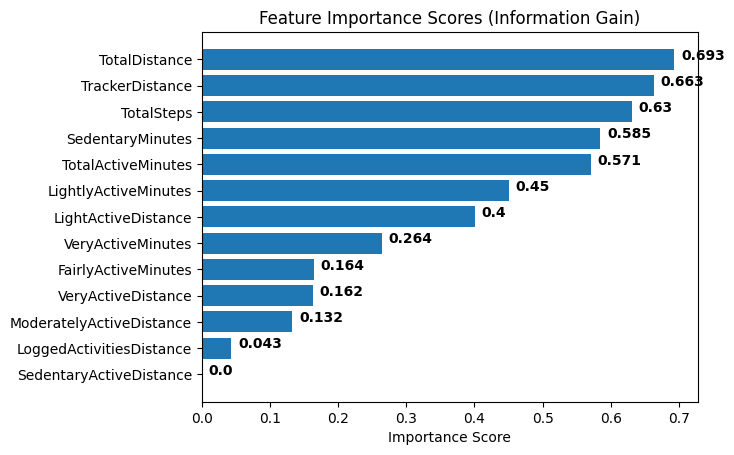

In [39]:
x = daily_train.drop(columns=["Unnamed: 0","Id","ActivityDate","Calories"])
y = daily_train["Calories"]

#Apply Information Gain
ig = mutual_info_regression(x,y)

#Create a dictionary of feature importance scores
feature_scores = {}
for i in range(len(x.columns)):
    feature_scores[x.columns[i]] = ig[i]

# Sort the features by importance score in descending order
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

#Sort the features by importance scores and the sorted features
for feature, score in sorted_features:
    print("Features:", feature, "Score: ", score)

#Plot a horizontal bar chat of the feature importance scores
fig, ax = plt.subplots()
y_pos = np.arange(len(sorted_features))
ax.barh(y_pos, [score for feature, score in sorted_features], align="center")
ax.set_yticks(y_pos)
ax.set_yticklabels([feature for feature, score in sorted_features])
ax.invert_yaxis()  # Labels read top-to-bottom
ax.set_xlabel("Importance Score")
ax.set_title("Feature Importance Scores (Information Gain)")

# Add importance scores as labels on the horizontal bar chart
for i, v in enumerate([score for feature, score in sorted_features]):
    ax.text(v + 0.01, i, str(round(v, 3)), color="black", fontweight="bold")
plt.show()

### 2.1.2. Sleep Day

Features: TotalTimeInBed Score:  1.776531565369722
Features: TotalSleepRecords Score:  0.026385899891688824


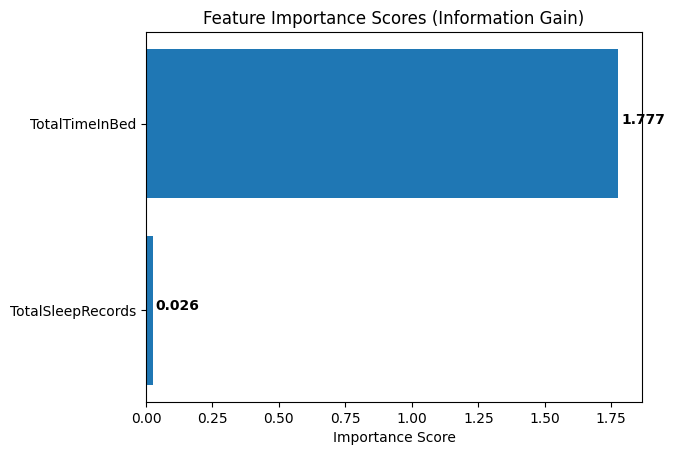

In [41]:
x = sleepDay_train.drop(columns=["Unnamed: 0","Id", "ActivityDate", "ActivityTime", "TotalMinutesAsleep"])
y = sleepDay_train["TotalMinutesAsleep"]

#Apply Information Gain
ig = mutual_info_regression(x,y)

#Create a dictionary of feature importance scores
feature_scores = {}
for i in range(len(x.columns)):
    feature_scores[x.columns[i]] = ig[i]

# Sort the features by importance score in descending order
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

#Sort the features by importance scores and the sorted features
for feature, score in sorted_features:
    print("Features:", feature, "Score: ", score)

#Plot a horizontal bar chat of the feature importance scores
fig, ax = plt.subplots()
y_pos = np.arange(len(sorted_features))
ax.barh(y_pos, [score for feature, score in sorted_features], align="center")
ax.set_yticks(y_pos)
ax.set_yticklabels([feature for feature, score in sorted_features])
ax.invert_yaxis()  # Labels read top-to-bottom
ax.set_xlabel("Importance Score")
ax.set_title("Feature Importance Scores (Information Gain)")

# Add importance scores as labels on the horizontal bar chart
for i, v in enumerate([score for feature, score in sorted_features]):
    ax.text(v + 0.01, i, str(round(v, 3)), color="black", fontweight="bold")
plt.show()

## 2.2. Forward Selection

In [ ]:
# from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
12313

NameError: name 'train_test_split' is not defined

## 2.3. Chi_Square

# 3. Split and Prepare Data

## 3.1. Daily Activity

## 3.2. Sleep Day


# 4. Model
#### Decision Tree, Logistic Regression, Random Forest, KNN, Naive Bayes, SVM

# 5. Apply Model